## Missing piece in linear classification: Non-Linear activation functions

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [8]:
import numpy as np
import pandas as pd

## Creating Data to view fit

To do so, we'll use Scikit-Learn's make_circles() function.



In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [5]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


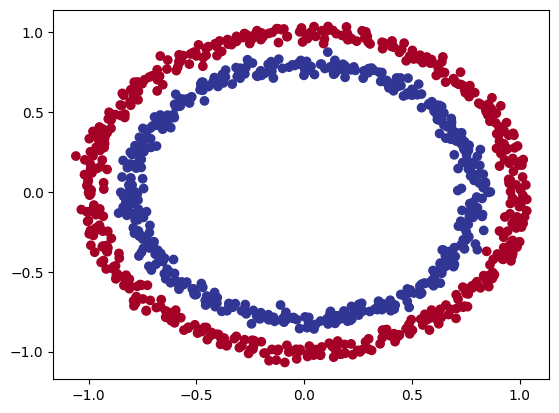

In [6]:
# Visualise the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

We will first build a model using linear activation function and see how it works


In [7]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),
    tf.keras.layers.Dense(1)  # Output only 1
])

#Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 5.4590 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3731 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2750 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2311 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1123 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9843 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7594 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6103 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5636 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5531 - accuracy: 0.4730
Epoch 11/

And let's see how our model is making predictions on it.



In [9]:
# check the descision boundary (importing plot_descision_boundary from github)
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py

--2023-08-01 09:34:03--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11875 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.60K  --.-KB/s    in 0s      

2023-08-01 09:34:03 (60.1 MB/s) - ‘helper_functions.py’ saved [11875/11875]



In [10]:
from helper_functions import plot_decision_boundary

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


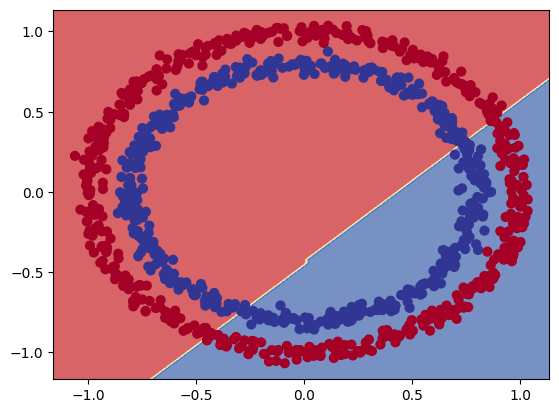

In [11]:
plot_decision_boundary(model_1, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)
What we're going to have to do is add some non-linearity to our model.



In [13]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
model_2.fit(X, y, epochs=100)



Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.7779 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3727 - accuracy: 0.4090
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2736 - accuracy: 0.4400
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2035 - accuracy: 0.4550
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1478 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0324 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9308 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.4740
Epoch 11/

Still not as good as we like


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


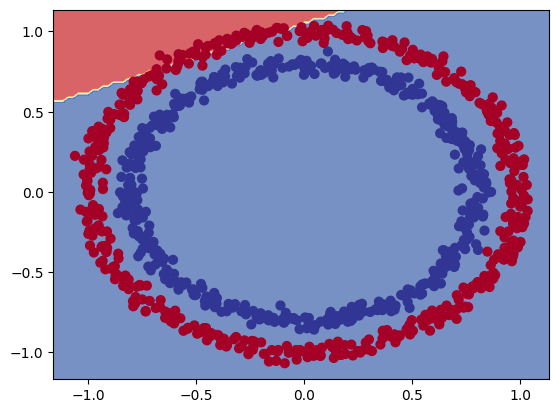

In [14]:
# check the descision boundary
plot_decision_boundary(model_2, X, y)

Now its in the opposite side

Lets try to increase the hidden layer

In [18]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"), # activation=tf.keras.activations.relu   also works
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
model_3.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Still 50% ,
Lets try increasing neurons in hidden layers

In [17]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(X, y, epochs=100)



Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 1.3266 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9501 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9101 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8783 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.4240
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8314 - accuracy: 0.4050
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.3790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7986 - accuracy: 0.3600
Epoch 11/

In [19]:
# Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 3s 17ms/step - loss: 0.4829 - accuracy: 0.8280


[0.48292553424835205, 0.828000009059906]

Its working best among alll the models

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


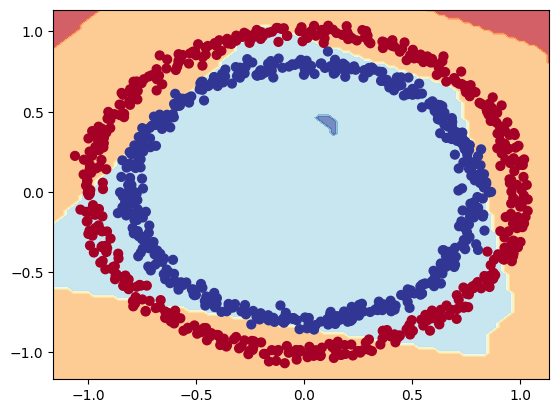

In [20]:
# check boundary predictions with more hidden layers with greater neurons
plot_decision_boundary(model_4, X, y)

Model is still drawing straight lines,
Now we will use sigmoid activation in output layer to add non-linearity


In [22]:
# set random seed
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history_5 = model_5.fit(X, y, epochs=100, verbose=0)



In [23]:
model_5.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.9860


[0.22471672296524048, 0.9860000014305115]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


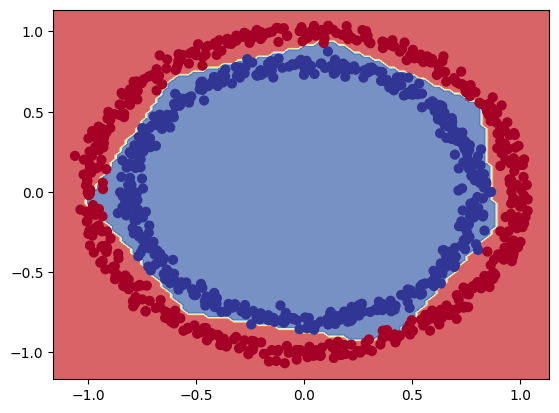

In [24]:
# check the descision boundary
plot_decision_boundary(model_5, X, y)

Much better

## Evaluating the model

In [25]:
len(X)

1000

In [26]:
X_train = X[:800]  # 80% training data
y_train = y[:800]

X_test = X[:800] # 20% testing data
y_test = y[:800]



Create the new model (same as model_5) and use training data and lebels to train

In [29]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_6 = model_6.fit(X_train, y_train, epochs=100, verbose=0)   # verbose=0 less output

In [30]:
model_6.evaluate(X_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7887


[0.5108416676521301, 0.7887499928474426]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


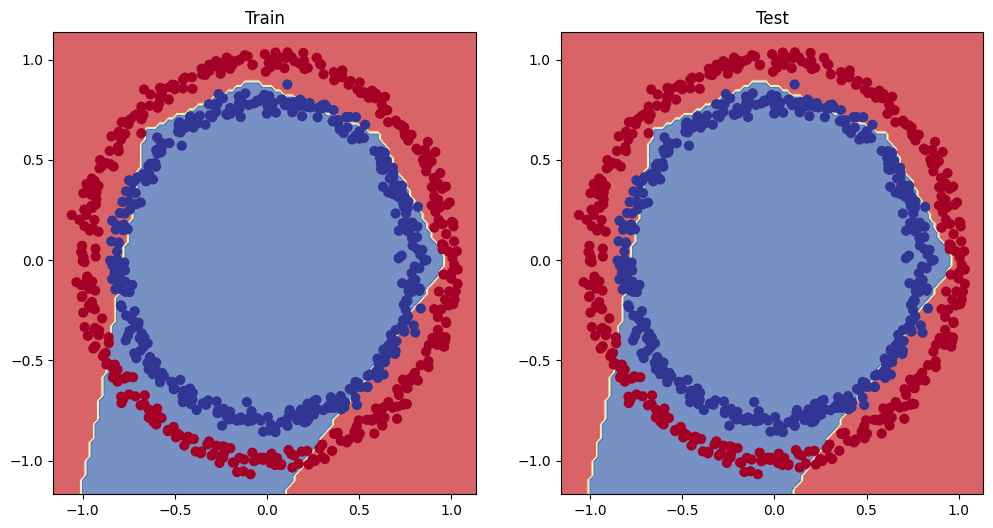

In [31]:
# checking the boundary descision
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)


##Plot the loss curves

In [33]:
pd.DataFrame(history_6.history)

,loss,accuracy
0,0.695108,0.49000
1,0.692735,0.49750
2,0.690993,0.49875
3,0.690074,0.49875
4,0.689415,0.50125
...,...,...
95,0.522776,0.78875
96,0.520832,0.79375
97,0.517668,0.78375
98,0.515040,0.79625


Text(0.5, 1.0, 'model_6 training curve')

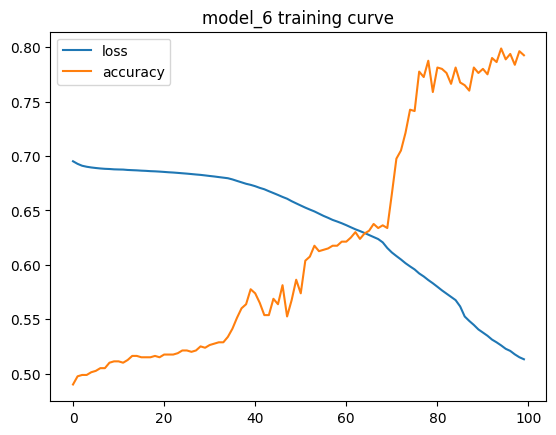

In [34]:
# plotting the loss curve
pd.DataFrame(history_6.history).plot()
plt.title("model_6 training curve")


Beautiful. This is the ideal plot when dealing with a classification problem, loss going down, accuracy going up.





